# Preprocessing data before machine learning

In preparation to the machine learning tutorial/practical, we are going to preprocess the data to get the most out of it.  We are using some ideas proposed in https://www.ahmedbesbes.com/blog/kaggle-titanic-competition  

Let's load the data using pandas as we learnt in the previous notebooks.

In [5]:
import pandas as pd
# we are loading data from github. 
dataurl = 'https://github.com/rrr-uom-projects/MPiCRT-AI/raw/main/Data/titanic.csv' 
pax = pd.read_csv(dataurl, sep = ',')

We need to understand the data we have to start making sense of it. Here is a short description of the series:

- **PassengerId** Arbitrary nr between 1 and 841
- **Survived** Weather Survived or not: 0 = No, 1 = Yes
- **Pclass** Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- **Name** Name of the Passenger
- **Sex** Female/male
- **Age** Age in years
- **SibSp** No. of siblings / spouses aboard the Titanic
- **Parch** No. of parents / children aboard the Titanic
- **Ticket** Ticket number
- **Fare** Passenger fare
- **Cabin** Cabin number
- **Embarked** Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton


Let's sort the categorical variables correctly here.

In [6]:
pax['Sex'] = pax['Sex'].astype('category')
pax['Survived'] = pax['Survived'].astype("category")
pax['Pclass'] = pax['Pclass'].astype("category")
pax['Embarked'] = pax['Embarked'].astype("category")

pax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


Notice that the data we have is the same as the training dataset of the Kaggle competition: https://www.kaggle.com/c/titanic/  
We will learn about training/validation/testing data split on next lecture.

Let's import seaborn for visualisation and other useful libraries.

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In machine learning, the outcome we want to predict is called the **target variable**.  Anything that is used to predict the target is called a **feature**. Many of the algorithms that we will use do not support missing data in the features nor categorical variables, so we will need to do some data transformation to make it compatible.

## Important variables - Univariable testing with SciPy

Let's see if the patterns/differences we observed last time are 'statiscally' solid. 

### Sex? Class? - Categorical Variables

In the previous notebook we were able to see some patterns and realised that females were more likely to survive, and that people in the lowest class was less likely to survive.  Let's plot what we mean:

<Axes: xlabel='Pclass', ylabel='percent'>

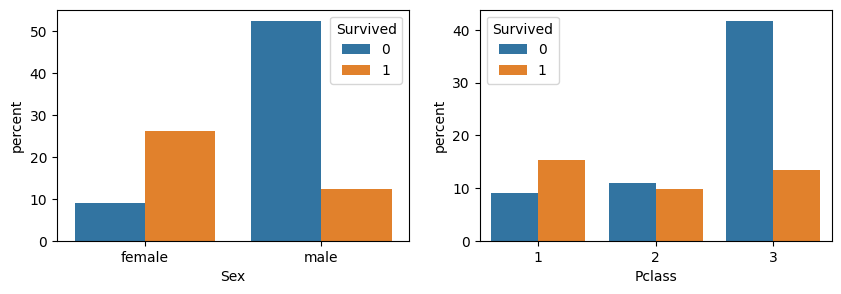

In [8]:
fig, axs = plt.subplots(1,2,figsize=(10, 3)) # plotting multiple panels
sns.countplot( x='Sex',hue='Survived', data=pax, stat='percent', ax=axs[0] )
sns.countplot( x='Pclass',hue='Survived', data=pax, stat='percent', ax=axs[1] )

We can also test this to see whether what we see is statistically significances. In this case, we want to test whether two categorical variables are related, e.g., Sex vs Survived or Pclass vs Survived.  The common test used in this situation is the Chi-squared test. 

Let's use the implementation in SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [9]:
from scipy.stats import chi2_contingency

To use this test, we need to build a contingency table.  In this table we simply summarise the number of times all combinations of the categorical values are observed.  Let's do this:


In [10]:
sex_suriv_contingency_table = pd.crosstab(pax["Sex"], pax["Survived"])
print(sex_suriv_contingency_table)

Survived    0    1
Sex               
female     81  233
male      468  109


In [11]:
chi2, p, dof, expected = chi2_contingency(sex_suriv_contingency_table)

Given the number of categories, the expected contigency table if there was no relationship between these variables is:

In [12]:
print("Expected frequencies:")
print(pd.DataFrame(expected, index=sex_suriv_contingency_table.index, columns=sex_suriv_contingency_table.columns))

Expected frequencies:
Survived           0           1
Sex                             
female    193.474747  120.525253
male      355.525253  221.474747


Checking the p-value will tell us whether the differences we are seeing are significant or not. 

Given a level of significance (often 0.05) we can check whether the differences we see are due to chance:
- If p < 0.05, we reject the null hypothesis. In this case, we will say that there is likely a relationship between Sex and Survival. 
- If p > 0.05 then we say that the difference is not significant and it can be attributed to chance.

In [13]:
print(f"P-value: {p}")

P-value: 1.1973570627755645e-58


In this case, the value is super small, so we can say that the difference in survival between males/females is very unlikely to be caused by chance.  



We can run a similar analysis for Pclass:

In [14]:
pclass_suriv_contingency_table = pd.crosstab(pax["Pclass"], pax["Survived"])
print(pclass_suriv_contingency_table)

chi2, p, dof, expected = chi2_contingency(pclass_suriv_contingency_table)

print("Expected frequencies:")
print(pd.DataFrame(expected, index=pclass_suriv_contingency_table.index, columns=pclass_suriv_contingency_table.columns))

print(f"P-value: {p}")


Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Expected frequencies:
Survived           0           1
Pclass                          
1         133.090909   82.909091
2         113.373737   70.626263
3         302.535354  188.464646
P-value: 4.549251711298793e-23


Looking at the p-value, what can you conclude?

You can also repeat this analysis with Embarked.

In [15]:
# Write some code here?


### Age? Fare? - Continous variable

We also saw a different pattern related on the Age and Fare.

<Axes: ylabel='Fare'>

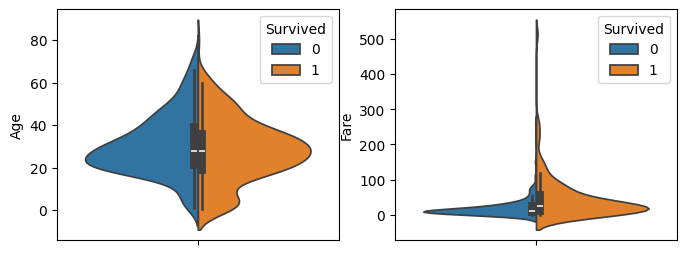

In [16]:
fig, axs = plt.subplots(1,2,figsize=(8, 3)) # plotting multiple panels
sns.violinplot(y='Age', hue='Survived', data=pax,  split=True, ax=axs[0] )
sns.violinplot(y='Fare', hue='Survived', data=pax,  split=True, ax=axs[1] )

We can test this difference using, for example, the t-test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [17]:
from scipy.stats import ttest_ind

In [18]:
agesurv0 = pax.loc[pax['Survived']==0,'Age']
agesurv1 = pax.loc[pax['Survived']==1,'Age']
print(np.mean(agesurv0), np.mean(agesurv1))

30.62617924528302 28.343689655172415


In [19]:
tstat,p=ttest_ind(agesurv0,agesurv1)
print(f"P-value: {p}")

P-value: nan


Why did we get nan??? 

In [20]:
### count values that are nan here:

# what do they mean? 


A way around this is to tell scipy to ignore nan values when running the ttest:

In [21]:
tstat,p=ttest_ind(agesurv0,agesurv1,nan_policy='omit')
print(f"P-value: {p}")

P-value: 0.03912465401348249


Inspecting the p-value... What is your conclusion? (assuming a level of significance of 0.05)

Let's repeat the analysis for Fare.  We already know that Fare is correlated to Pclass, so the question is whether with find a similar correlation with Survived.  

<Axes: xlabel='Pclass', ylabel='Fare'>

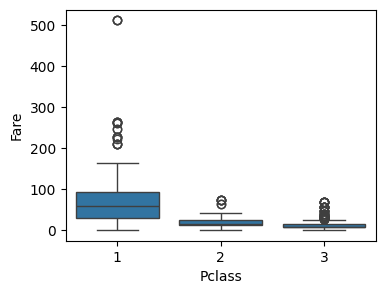

In [22]:
fig, axs = plt.subplots(1,1,figsize=(4, 3)) # plotting multiple panels
sns.boxplot(x='Pclass',y='Fare',data=pax, ax=axs )

In [23]:
faresurv0 = pax.loc[pax['Survived']==0,'Fare']
faresurv1 = pax.loc[pax['Survived']==1,'Fare']
print(np.mean(faresurv0), np.mean(faresurv1))
tstat,p=ttest_ind(faresurv0,faresurv1,nan_policy='omit')
print(f"P-value: {p}")

22.117886885245902 48.39540760233918
P-value: 6.120189341924198e-15


You could argue that Fare is not normally distributed. Alternatively, you could use Mann Withney U test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [26]:
from scipy.stats import mannwhitneyu
print(np.median(faresurv0), np.median(faresurv1))
stat,p=mannwhitneyu(faresurv0,faresurv1,nan_policy='omit')
print(f"P-value: {p}")

10.5 26.0
P-value: 4.553477179250237e-22


What can you conclude? 

## Dealing with missing values

We already saw that having NaN values can make our life difficult.  This is why it is important to decide what to do about missing data.  

One approach is to 'drop' all the entries with missing values. That can be done with the function dropna: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

Let's see what this would do to our dataset:

In [27]:
paxnonans = pax.dropna()
print('Before dropping NaNs:', pax.shape)
print('After dropping NaNs: ', paxnonans.shape)

Before dropping NaNs: (891, 12)
After dropping NaNs:  (183, 12)


In this case we are left with ~20% of the data (183 rather than 891 passangers).  This will heavily limit our ability to do any machine learning on this data!  Instead, let's first figure out which are the values that have more missing values and whether it is worth working on it.

In [28]:
pax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


In order: 
- Cabin has >77% missing values. Is this an important variable??
- Age has almost 20% missing values. Is this an important variable? 
- Embarked has 2 missing values.

### Imputing Age

We need to see whether there are differences for Age related to other features, e.g. Sex, Pclass, Embarked, etc.

<Axes: xlabel='Embarked', ylabel='Age'>

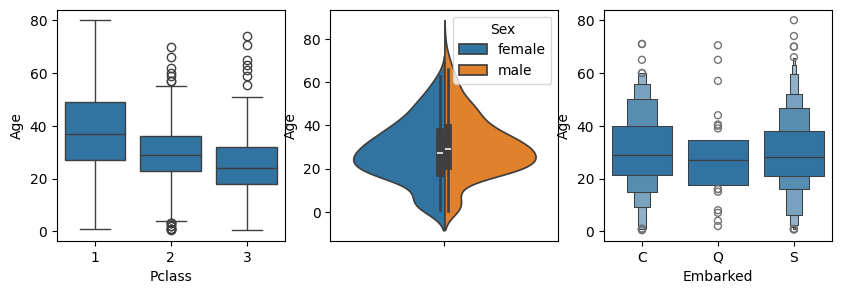

In [29]:
fig, axs = plt.subplots(1,3,figsize=(10, 3)) # plotting multiple panels
sns.boxplot(x='Pclass',y='Age',data=pax, ax=axs[0] )
sns.violinplot(hue='Sex',y='Age',data=pax, split=True,ax=axs[1] )
sns.boxenplot(x='Embarked',y='Age',data=pax, ax=axs[2] )

In [30]:
medianAges = pax.groupby(['Sex','Pclass','Embarked'], observed=True)[['Age']].median()
medianAges = medianAges.reset_index()
print(medianAges)

       Sex Pclass Embarked    Age
0   female      1        C  37.00
1   female      1        Q  33.00
2   female      1        S  33.00
3   female      2        C  22.00
4   female      2        Q  30.00
5   female      2        S  29.00
6   female      3        C  14.25
7   female      3        Q  20.00
8   female      3        S  23.00
9     male      1        C  36.50
10    male      1        Q  44.00
11    male      1        S  42.00
12    male      2        C  29.50
13    male      2        Q  57.00
14    male      2        S  30.00
15    male      3        C  26.00
16    male      3        Q  27.00
17    male      3        S  25.00


We can create a function tht given a line with missing values, returns the median according to their Sex, Pclass and Embarkment point:

In [31]:
def getMedianAgeForCategory(row):
    # using the dataframe medianAges created above.
    condition = (
        (medianAges['Sex'] == row['Sex']) & 
        (medianAges['Pclass'] == row['Pclass']) & 
        (medianAges['Embarked'] == row['Embarked'])
    ) 
    return medianAges[condition]['Age'].values[0]

Let's find one passenger with Age == NaN and see it applied:

In [32]:
print(pax.loc[np.isnan(pax['Age']),['Pclass','Sex','Embarked','Age']])

    Pclass     Sex Embarked  Age
5        3    male        Q  NaN
17       2    male        S  NaN
19       3  female        C  NaN
26       3    male        C  NaN
28       3  female        Q  NaN
..     ...     ...      ...  ...
859      3    male        C  NaN
863      3  female        S  NaN
868      3    male        S  NaN
878      3    male        S  NaN
888      3  female        S  NaN

[177 rows x 4 columns]


In [34]:
index  = 19
row =  pax.loc[index,['Pclass','Sex','Embarked','Age']]
print(row)
print('>> Imputed age: ', getMedianAgeForCategory(row))


Pclass           3
Sex         female
Embarked         C
Age            NaN
Name: 19, dtype: object
>> Imputed age:  14.25


Let's now impute for all values that are missing in the Series Age, using the function Apply(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html 

In [35]:
def imputeIfNeeded(row):
    return getMedianAgeForCategory(row) if np.isnan(row['Age']) else row['Age']

# Alternatively:
#def imputeIfNeeded(row):
#    theage = row['Age']
#    if np.isnan(theage):
#        theage = getMedianAgeForCategory(row)
#    return theage


#let's make a copy of the values before imputing
pax['AgeWithNaNs']=pax['Age']
pax['Age'] = pax.apply(imputeIfNeeded, axis=1)


<Axes: xlabel='AgeWithNaNs', ylabel='Age'>

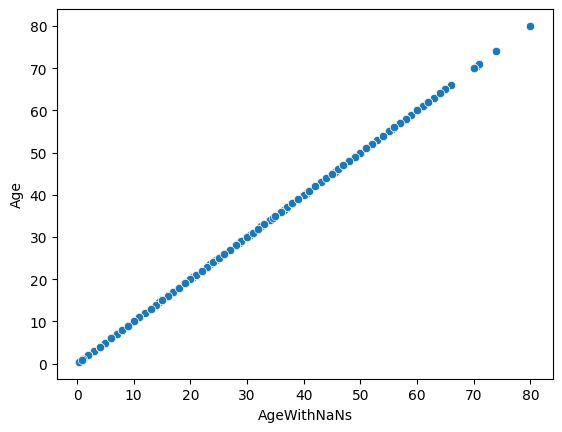

In [36]:
#Let's check that we have not messed up the values that were there before.
sns.scatterplot(x='AgeWithNaNs',y='Age',data=pax)

## Coding extra information

Up to now we have not done much with the variable Name (beside counting Mary's in the first notebook!) nor SibSp/Parch. We could still extract some information from these.



### Titles?
If we observe this variable, each name has the title of the person:

In [37]:
pax['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

With some domain information, we can see that these titles can give us extra information. For example, if there was any person from the Royal family, it is likely they would survive independent of the Sex, Fare, Embarkment, etc.  

Let' try and extract these data.  We see that the title is always after a comma and finishes in a dot. We have already extracted the surname in the first notebook, let's copy the relevant code and extend it here:

In [38]:
# First we need to cast the type of the Name series to str. 
pax['Name'] = pax['Name'].astype('string')
surnamefirstnames = pax['Name'].str.split(',')  # this splits the string by the token given (,)
pax['Surname'] = surnamefirstnames.str.get(0)   # here we get the first bit of the divided sentence
afterComma = surnamefirstnames.str.get(1).str.split('.')# this splits the string by the token given (.)
pax['Title'] = afterComma.str.get(0).str.strip()        # here we get the first bit of the divided sentence and eliminate empty spaces
print(pax['Title'].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


With some knowledge of titles (and checking the blog), we see that these titles correspond to crew/officers of the ship, Royalty, etc..

- Capt: Officer,
- Col: Officer,
- Major: Officer,
- Jonkheer: Royalty,
- Don: Royalty,
- Sir : Royalty,
- Dr: Officer,
- Rev: Officer,
- the Countess:Royalty,
- Mme: Mrs,
- Mlle: Miss,
- Ms: Mrs,
- Mr : Mr,
- Mrs : Mrs,
- Miss : Miss,
- Master : Master,
- Lady : Royalty

We can use a similar strategy as you used in a previous practical to create a new category: TitleType.  For this we can create a dictionary and use map().

In [39]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
pax['TitleType'] = pax['Title'].map(Title_Dictionary)
pax['TitleType'] = pax['TitleType'].astype('category')
print(pax['TitleType'].value_counts())

TitleType
Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64


<Axes: xlabel='TitleType', ylabel='percent'>

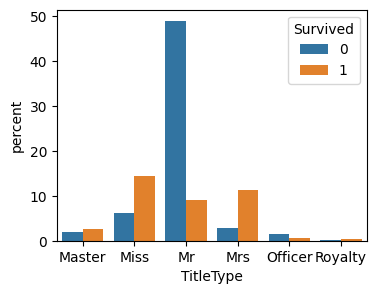

In [40]:
fig, axs = plt.subplots(1,1,figsize=(4, 3)) # plotting multiple panels
sns.countplot( x='TitleType',hue='Survived', data=pax, stat='percent', ax=axs )

### Family sizes?

We have also ignored up to now the variables SibSp (nr of Siblings/Spouses) and Parch (nr of parents/children) related to a given passanger.  We could assume that as large families are grouped together, then they are more likely to get rescued than people traveling/floating alone.

We can then create a variable 'family size' and binary variables identifying whether the passanger was travelling on their own, or as part of a small or larger family.

In [41]:
pax['FamilySize'] = pax['SibSp']+pax['Parch']+1 # why +1?

In [42]:
def getFamilyType(famsize):
    return 'single' if famsize == 1 else ('smallFamily' if famsize < 5 else 'largeFamily')

pax['FamilyType'] = pax['FamilySize'].apply(getFamilyType)
pax['FamilyType'] = pax['FamilyType'].astype('category')

<Axes: xlabel='FamilyType', ylabel='percent'>

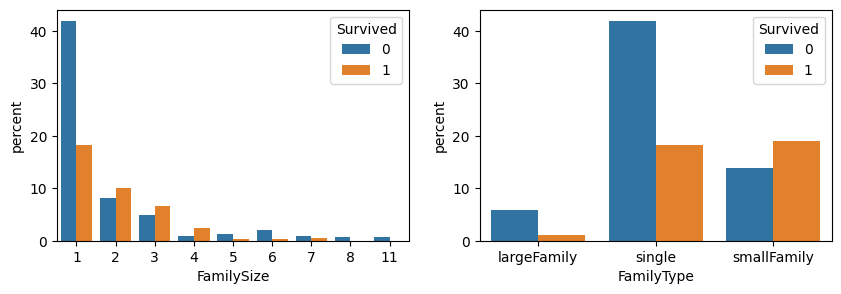

In [43]:
fig, axs = plt.subplots(1,2,figsize=(10, 3)) # plotting multiple panels
sns.countplot( x='FamilySize',hue='Survived', data=pax, stat='percent', ax=axs[0] )
sns.countplot( x='FamilyType',hue='Survived', data=pax, stat='percent', ax=axs[1] )

Was the assumption of larger families more likely to survive supported by the data?  You could also do some testing here!

In [ ]:
# For the interested reader! ;-)

## Dummy Variables

Some of the approaches we will test later on do not work good with categories. So, we need to create 'dummy' variables, where the content are just True/False depending on the value of the category.  For example the variable FamilyType would create 3 dummy variables: FamilyType_single, FamilyType_smallFamily and FamilyType_LargeFamily.  

The function 'get_dummies' from pandas would do that for us:

In [ ]:
family_dummies = pd.get_dummies(pax['FamilyType'], prefix='FamilyType')
print(family_dummies)

We will do this to all important categorical variables in the dataset for the classification practical next week.